<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/var_various_ways1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Value at Risk, VaR
In this code, using Geometric Brownian Motion, simulate returns and create distribution. And then find the VaR.


###VaR

Value at risk (VaR): Loss that will be incurred in the event of an extreme adverse price change with some given, usually low, probability. i.e., the worst-case outcome.

1% VaR means that 99% of returns will exceed the VaR and 1% of returns will be worse.

Assuming that portfolio returns are normally distributed, the VaR is fully determined by the mean and SD of the distribution. 

For example, VaR(1%, normal) = Mean - 2.33SD

To obtain a sample estimate of 1%  VaR, we sort the observations from high to low. The VaR is the return at the 1st percentile of the sample distribution.

For example, with 95% confidence, we expect that our worst daily loss will not exceed 4%. If we invest 100 dollars, we are 95% confident that our worst daily loss will not exceed 4 dollars (100 dollars x -4%).



|Confidence Level |Two sided CV   |One sided CV   | 
|---|---|---|
| 90%  |1.64   |1.28   |  
| 95%  |1.96   |1.64   |  
| 99%  |2.58   |2.33   |  

In [35]:
!pip install pandas-datareader
!pip install --upgrade pandas-datareader 
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import math
import numpy as np
import numpy.random as npr
import pandas as pd  
import pandas_datareader as pdr
import yfinance as yf

import scipy as sp
from scipy.stats import norm

from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'Deja Vu'
%matplotlib inline

In [5]:

sp.stats.norm.ppf(1-.10/2).round(2)

1.64

In [ ]:
sp.stats.norm.ppf(1-.05/2).round(2)

1.96

In [ ]:
sp.stats.norm.ppf(1-.01/2).round(2)

2.58

In [ ]:
sp.stats.norm.ppf(1-.10).round(2)

1.28

In [ ]:
sp.stats.norm.ppf(1-.05).round(2)

1.64

In [ ]:
sp.stats.norm.ppf(1-.01).round(2)

2.33

In [23]:
# for short time horizons er will be small, and therefore VaR estimations
# will not be much influenced by it
# assuming that portfolio is normally distributed, 


def var_calc(CL, days, p_val, vol, t):


  cutoff = norm.ppf(CL)
  print("cutoff = {:.2f}".format(cutoff))
  #VaR = 760000 * 0.307 *sqrt(21/252) * 1.64
  VaR = p_val * vol * np.sqrt(t/days) * cutoff
  print("Assuming that we invest {:.2f}".format(p_val))
  print("At {:.3f} confidence level, loss will not exceed {:,.2f}".format(CL, VaR))
  print("This represents a move of {:.2f} standard deviations below the expected return.".format(cutoff))

  return

In [24]:
var_calc(.95, 252, 760000, .307, 21)

cutoff = 1.64
Assuming that we invest 760000.00
At 0.950 confidence level, loss will not exceed 110,786.95
This represents a move of 1.64 standard deviations below the expected return.


In [25]:
var_calc(.975, 252, 760000, .307, 21)

cutoff = 1.96
Assuming that we invest 760000.00
At 0.975 confidence level, loss will not exceed 132,010.79
This represents a move of 1.96 standard deviations below the expected return.


In [29]:
var_calc(.99, 252, 760000, .307, 21)

cutoff = 2.33
Assuming that we invest 760000.00
At 0.990 confidence level, loss will not exceed 156,688.10
This represents a move of 2.33 standard deviations below the expected return.


In [27]:
# checking the Z score for 95%
cutoff = norm.ppf(CL)
cutoff.round(2)

1.96

In [28]:
# checking the Z score for 99%
cutoff = norm.ppf(.99)
cutoff.round(2)

2.33

In [ ]:
# checking the Z score for 90%
cutoff = norm.ppf(.90)
cutoff.round(2)

1.28

In [ ]:
# let's check
VaR_95 = round(760000 * 0.307 * np.sqrt(21/252) * 1.6448536269514722, 2)
VaR_95

110786.95

In [ ]:
import scipy as sp
sp.stats.norm.ppf(1-.05/2).round(2)

1.96

In [ ]:
import scipy as sp
sp.stats.norm.ppf(1-.01/2).round(2)

2.58

In [ ]:
import scipy as sp
sp.stats.norm.ppf(1-.10/2).round(2)

1.64

In [33]:
def get_prices(tickers, freq_p, st_day, end_day):
    mystock = pd.DataFrame()
    for t in tickers:
        mystock[t] = yf.download(t, start=st_day, end=end_day, interval=freq_p)['Adj Close']
    return mystock

In [34]:
tic=['SPY', 'TSLA', 'AAPL', 'NVDA', 'BAC']
prices= get_prices(tic, freq_p='1wk', st_day="2011-01-01", end_day="2022-05-31")  # id , 1wk, 1mo
print(prices)

#prices.rename(columns={"TSLA": "Your_Stock", "SPY":"INDEX"}, inplace=True)

prices.info()
prices.tail(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   SPY        TSLA        AAPL        NVDA        BAC
Date                                                                 
2011-01-01  102.503990    5.648000   10.263880    4.562421  12.212250
2011-01-08  104.245445    5.150000   10.641310    5.416582  13.069247
2011-01-15  103.495644    4.608000    9.976838    5.102011  12.212250
2011-01-22  102.971596    4.802000   10.263272    5.455616  11.655198
2011-01-29  105.736961    4.692000   10.580849    5.894179  12.246529
...                ...         ...         ...         ...        ...
2022-04-23  412.000000  870.760010  157.418701  185.470001  35.680000
2022-04-30  411.339996  8

,SPY,TSLA,AAPL,NVDA,BAC
Date,,,,,
2022-01-15,436.623596,943.900024,161.965378,233.700195,44.701435
2022-01-22,440.581299,846.349976,169.863693,228.361084,45.646816
2022-01-29,447.310394,923.320007,171.918045,243.148575,48.045090
2022-02-05,439.095886,860.000000,168.392593,239.449203,47.686840
2022-02-12,432.885193,856.979980,167.054550,236.379730,45.736378
2022-02-19,436.394287,809.869995,164.608154,241.528854,44.800953
2022-02-26,430.831573,838.289978,162.930603,229.320923,40.750755
2022-03-05,418.769043,795.349976,154.502991,221.000000,40.330002
2022-03-12,443.143311,905.390015,163.739426,264.529999,42.900002


### Let's assume that we buy 5000 shares of AAPL. And using historical returns, let's estimate mean and standard deviation of returns on AAPL. In order to save time, let's assume they are 19% and 30.7%, respectively. 

In [ ]:
aapl = 5000
aapl_price = pdr.get_quote_yahoo('AAPL')['price'] # the most recent price
aapl_value = aapl * aapl_price
aapl_value = aapl_value.at['AAPL']
t = 21/252
er = .19
volatility = .307
iterations = 50000

In [ ]:
type(aapl_price)

pandas.core.series.Series

In [ ]:
aapl_price.describe()

count      1.00
mean     164.85
std         NaN
min      164.85
25%      164.85
50%      164.85
75%      164.85
max      164.85
Name: price, dtype: float64

In [ ]:
# checking to see what get_quote_yahoo is retreveing
pdr.get_quote_yahoo('AAPL')


,language,region,quoteType,quoteSourceName,triggerable,customPriceAlertConfidence,exchange,market,currency,marketState,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,esgPopulated,firstTradeDateMilliseconds,priceHint,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,pageViewGrowthWeekly,averageAnalystRating,tradeable,displayName,price
AAPL,en-US,US,EQUITY,Nasdaq Real Time Price,True,HIGH,NMS,us_market,USD,CLOSED,Apple Inc.,Apple Inc.,finmb_24937,America/New_York,EST,-18000000,False,345479400000,2,-0.309378,1645837199,164.34,-0.51001,2.110001,1.296547,1645822803,164.85,165.04,160.8738 - 165.04,160.8738,90795431,162.74,164.4,164.45,10,14,NasdaqGS,USD,163.84,102408446,87661990,48.640007,0.418553,116.21 - 182.94,-18.089996,-0.098885,116.21,182.94,1644451200,1643301000,1651003200,1651521600,0.865,27.406485,0.005315,6.015,6.56,6.16,26.761366,16319399936,4.402,171.4202,-6.57019,-0.038328,151.8316,13.018402,0.085742,2690253062144,25.129574,37.448887,15,0,0.024751,1.8 - Buy,False,Apple,164.85


In [ ]:
type(aapl_price)

pandas.core.series.Series

In [ ]:
type(aapl_value)

numpy.float64

In [ ]:
aapl_price

AAPL    164.85
Name: price, dtype: float64

In [ ]:
# aapl_value = # of shares times price
aapl_value

824250.0

Below, let's simulate future value from Geometric Brownian Motion series. 

In [ ]:
def VaR(pv, er, vol, T, iterations):
    end = pv * np.exp((er - .5 * vol ** 2) * T + 
                     vol * np.sqrt(T) * np.random.standard_normal(iterations))
    ending_values = end - pv
    return ending_values

In [ ]:
at_risk = VaR(aapl_value, er, volatility, t, iterations)
at_risk

array([267075.86942993,   2492.06809526,  82860.28614255, ...,
        66526.37636915,  73083.61037529,  25892.14775702])

In [ ]:
type(at_risk)

numpy.ndarray

In [ ]:
np.shape(at_risk)

(50000,)

In [ ]:
np.ndim(at_risk)

1

In [ ]:
at_risk.mean()

13354.595330942957

In [ ]:
at_risk.std()

74478.69238332179

(array([2.000e+00, 3.000e+00, 3.000e+00, 1.100e+01, 9.000e+00, 1.700e+01,
        2.000e+01, 2.000e+01, 3.200e+01, 2.900e+01, 5.500e+01, 6.700e+01,
        1.040e+02, 9.000e+01, 1.530e+02, 1.620e+02, 2.230e+02, 2.700e+02,
        3.420e+02, 3.720e+02, 4.370e+02, 4.760e+02, 5.900e+02, 6.300e+02,
        7.780e+02, 7.870e+02, 9.400e+02, 9.710e+02, 1.143e+03, 1.173e+03,
        1.315e+03, 1.423e+03, 1.376e+03, 1.498e+03, 1.586e+03, 1.571e+03,
        1.629e+03, 1.689e+03, 1.683e+03, 1.670e+03, 1.679e+03, 1.618e+03,
        1.589e+03, 1.543e+03, 1.530e+03, 1.413e+03, 1.332e+03, 1.308e+03,
        1.209e+03, 1.114e+03, 1.150e+03, 9.400e+02, 8.830e+02, 8.830e+02,
        7.620e+02, 6.270e+02, 6.230e+02, 5.480e+02, 4.960e+02, 4.100e+02,
        3.750e+02, 3.520e+02, 3.040e+02, 2.800e+02, 2.510e+02, 2.160e+02,
        1.820e+02, 1.450e+02, 1.520e+02, 1.090e+02, 9.600e+01, 8.000e+01,
        8.000e+01, 6.200e+01, 5.600e+01, 4.600e+01, 2.800e+01, 3.200e+01,
        2.300e+01, 2.000e+01, 1.800e+0

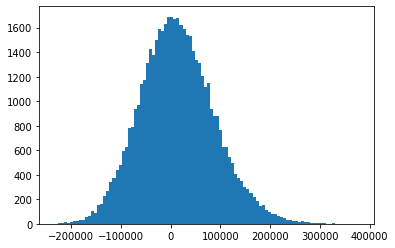

In [ ]:
plt.hist(at_risk,bins=100)

In [ ]:
percentiles = [1,5,10]
np.percentile(at_risk, percentiles)

array([-146506.22397474, -103555.64877737,  -79566.67245275])